In [1]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Import dataset

In [2]:
turbine = 'T07'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [3]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-01-01 00:00:00        T07             -11.5       1254.9   
2016-01-01 00:10:00        T07              -1.9       1251.9   
2016-01-01 00:20:00        T07              12.9       1251.1   
2016-01-01 00:30:00        T07              30.5       1259.9   
2016-01-01 00:40:00        T07             187.0       1288.2   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-01-01 00:00:00                  2.5             112.7   
2016-01-01 00:10:00                  0.9              95.5   
2016-01-01 00:20:00                  0.8             103.6   
2016-01-01 00:30:00                  1.2             134.3   
2016-01-01 00:40:00                 -0.6             297.5   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                178.7               41.0   
2016-01-01 00:10:00                191.8               42.0   
2016-01-01 00:20:00                213.8               42.0   
2016-01-01 00:30:00                199.3               42.0   
2016-01-01 00:40:00                199.9               42.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-01-01 00:00:00                0.9                    0.2   
2016-01-01 00:10:00                1.4                    0.2   
2016-01-01 00:20:00                1.5                  -33.8   
2016-01-01 00:30:00                1.5                  -88.7   
2016-01-01 00:40:00                1.6                  -92.2   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-01-01 00:00:00                  107.8  ...                   402.2   
2016-01-01 00:10:00                  101.1  ...                   401.9   
2016-01-01 00:20:00                  109.8  ...                   401.0   
2016-01-01 00:30:00                  132.7  ...                   400.6   
2016-01-01 00:40:00                  242.7  ...                   400.2   

                     grd_prod_psblepwr_std  grd_prod_cosphi_avg  \
timestamp                                                         
2016-01-01 00:00:00                   74.9                  0.8   
2016-01-01 00:10:00                   36.9                  0.7   
2016-01-01 00:20:00                   46.5                  0.7   
2016-01-01 00:30:00                   77.0                  0.7   
2016-01-01 00:40:00                   55.8                  0.9   

                     prod_latestavg_actpwrgen0  prod_latestavg_actpwrgen1  \
timestamp                                                                   
2016-01-01 00:00:00                        0.0                    18831.0   
2016-01-01 00:10:00                        0.0                    15865.0   
2016-01-01 00:20:00                        0.0                    17244.0   
2016-01-01 00:30:00                        0.0                    22284.0   
2016-01-01 00:40:00                        0.0                    49587.0   

                     prod_latestavg_actpwrgen2  rtr_rpm_std  component  \
timestamp                                                                
2016-01-01 00:00:00                        0.0          0.1       None   
2016-01-01 00:10:00                        0.0          0.1       None   
2016-01-01 00:20:00                        0.0          0.1       None   
2016-01-01 00:30:00                        0.0          0.2       None   
2016-01-01 00:40:00                        0.0          0.3       None   

                     remarks  failure  
timestamp                              
2016-01-01 00:00:00     None        0  
2016-01-01 00:10:00     None        0  
2016-01-01 00:20

## check number of failures

In [4]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


turbine_id          component  \
timestamp                                           
2016-04-30 12:40:00        T07  GENERATOR_BEARING   
2016-07-10 03:46:00        T07        TRANSFORMER   
2016-08-23 02:21:00        T07        TRANSFORMER   
2017-06-17 11:35:00        T07    HYDRAULIC_GROUP   
2017-08-20 06:08:00        T07  GENERATOR_BEARING   
2017-08-21 14:47:00        T07          GENERATOR   

                                                               remarks  \
timestamp                                                                
2016-04-30 12:40:00  High temperature in generator bearing (replace...   
2016-07-10 03:46:00                       High temperature transformer   
2016-08-23 02:21:00  High temperature transformer. Transformer refr...   
2017-06-17 11:35:00                                 Oil leakage in Hub   
2017-08-20 06:08:00                         Generator bearings damaged   
2017-08-21 14:47:00                                  Generator damaged   

                     failure  
timestamp                     
2016-04-30 12:40:00        1  
2016-07-10 03:46:00        1  
2016-08-23 02:21:00        1  
2017-06-17 11:35:00        1  
2017-08-20 06:08:00        1  
2017-08-21 14:47:00        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87212 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   87212 non-null  object 
 1   grd_prod_pwr_min             87207 non-null  float64
 2   gen_rpm_avg                  87207 non-null  float64
 3   blds_pitchangle_max          87207 non-null  float64
 4   grd_prod_pwr_avg             87207 non-null  float64
 5   amb_winddir_abs_avg          87207 non-null  float64
 6   gen_bear_temp_avg            87206 non-null  float64
 7   amb_windspeed_min            87207 non-null  float64
 8   grd_prod_reactpwr_max        87207 non-null  float64
 9   grd_prod_curphse1_avg        87207 non-null  float64
 10  grd_prod_pwr_max             87207 non-null  float64
 11  grd_prod_pwr_std             87207 non-null  float64
 12  blds_pitchangle_min          87207 non-

In [6]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [7]:
datatypes[datatypes['dtypes'] == 'int64']

dtypes
failure  int64

There is only 3 columns as string

In [8]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()
tags_int = datatypes[datatypes['dtypes'] == 'int64'].index.tolist()


## Check Duplicates

In [9]:
df[df.index.duplicated(keep=False)]

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-10-30 02:00:00        T07            1478.9       1667.8   
2016-10-30 02:00:00        T07            1945.4       1680.9   
2016-10-30 02:10:00        T07            1992.3       1680.9   
2016-10-30 02:10:00        T07            1240.0       1661.0   
2016-10-30 02:20:00        T07            1992.4       1680.7   
2016-10-30 02:20:00        T07            1506.4       1669.6   
2016-10-30 02:30:00        T07            1488.0       1678.8   
2016-10-30 02:30:00        T07            1846.4       1680.4   
2016-10-30 02:40:00        T07            1685.0       1680.5   
2016-10-30 02:40:00        T07            1438.9       1663.1   
2016-10-30 02:50:00        T07            1236.2       1663.7   
2016-10-30 02:50:00        T07            1357.7       1674.9   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-10-30 02:00:00                  3.5            1836.8   
2016-10-30 02:00:00                 11.8            1999.8   
2016-10-30 02:10:00                  9.5            2000.0   
2016-10-30 02:10:00                  2.8            1669.4   
2016-10-30 02:20:00                 10.0            2000.0   
2016-10-30 02:20:00                  4.5            1854.2   
2016-10-30 02:30:00                  9.1            1971.3   
2016-10-30 02:30:00                  9.6            1998.7   
2016-10-30 02:40:00                  8.9            1987.6   
2016-10-30 02:40:00                  5.9            1790.7   
2016-10-30 02:50:00                  6.0            1735.7   
2016-10-30 02:50:00                  5.7            1948.8   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-10-30 02:00:00                 90.1               69.0   
2016-10-30 02:00:00                 95.8               69.0   
2016-10-30 02:10:00                103.8               69.0   
2016-10-30 02:10:00                106.1               69.0   
2016-10-30 02:20:00                 94.8               69.0   
2016-10-30 02:20:00                105.6               69.0   
2016-10-30 02:30:00                121.0               68.0   
2016-10-30 02:30:00                 99.5               69.0   
2016-10-30 02:40:00                112.2               68.0   
2016-10-30 02:40:00                 95.9               69.0   
2016-10-30 02:50:00                 88.2               69.0   
2016-10-30 02:50:00                 73.7               68.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-10-30 02:00:00                1.6                 -198.0   
2016-10-30 02:00:00                3.2                 -211.3   
2016-10-30 02:10:00                3.0                 -216.8   
2016-10-30 02:10:00                2.3                 -201.5   
2016-10-30 02:20:00                5.6                 -217.5   
2016-10-30 02:20:00                2.7                 -204.4   
2016-10-30 02:30:00                1.6                 -201.0   
2016-10-30 02:30:00                4.8                 -217.3   
2016-10-30 02:40:00                3.4                 -204.6   
2016-10-30 02:40:00                2.4                 -206.7   
2016-10-30 02:50:00                1.5                 -201.2   
2016-10-30 02:50:00                1.9                 -201.6   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-10-30 02:00:00                 1536.8  ...                   399.2   
2016-10-30 02:00:00                 1668.7  ...                   400.9   
2016-10-30 02:10:00                 1676.4  ...                   398.8   
2016-10-30 02:10:00                 1398.7  ...                   399.7

In [10]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (87212, 85)
after (87206, 85)


## Splitting Training and Test Set

In [11]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [12]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                  0.999931
remarks                    0.999931
gen_bear_temp_avg          0.000069
grd_prod_cosphi_avg        0.000069
rtr_rpm_std                0.000057
                             ...   
grd_busbar_temp_avg        0.000057
grd_prod_psblepwr_min      0.000057
hvtrafo_phase2_temp_avg    0.000057
turbine_id                 0.000000
failure                    0.000000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [13]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             2
gen_rpm_avg                  2
blds_pitchangle_max          2
grd_prod_pwr_avg             2
amb_winddir_abs_avg          2
                            ..
grd_prod_cosphi_avg          2
prod_latestavg_actpwrgen0    2
prod_latestavg_actpwrgen1    2
prod_latestavg_actpwrgen2    2
rtr_rpm_std                  2
Length: 81, dtype: int64

In [14]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [15]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [16]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min          0.0
nac_temp_avg              0.0
gen_bear2_temp_avg        0.0
gen_rpm_max               0.0
amb_windspeed_est_avg     0.0
                         ... 
amb_windspeed_avg         0.0
grd_prod_voltphse3_avg    0.0
grd_busbar_temp_avg       0.0
grd_prod_psblepwr_min     0.0
rtr_rpm_std               0.0
Length: 81, dtype: float64

In [17]:
training_set_float = training_set[tags_float].copy()

## Check for tags with high correlation and drop one of them - VIF

In [18]:
vif_saved = True

if vif_saved == True:
    pass
else:
    print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    start_time = time.time()

    # Scaling first to ease the calculations
    scaler = StandardScaler()

    X = training_set_float.copy()
    X_scaled = scaler.fit_transform(X)

    # Keep DataFrame indexes ---------------------------------------------------------
    X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

    vif_factor_threshold = 5
    iter = 1
    span_tags_to_remove = 1

    while iter > 0:
        print(f'\r{len(X_scaled.columns)}', end="")

        vif = pd.DataFrame()
        vif["features"] = X_scaled.columns
        vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
        vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

        if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
            iter = 0
        else:
            tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
            cols = X_scaled.columns.tolist()
            for t in tag_name:
                cols.remove(t)
            X_scaled = X_scaled[cols].copy()

    execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
    print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    print(f'duration: {execution}')

    display(vif_high)

Started at --- 2021-11-09 19:35:49.806840
81

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


24Ended at --- 2021-11-09 20:12:31.948838
duration: --- %s minutes ---36.7


features  VIF Factor
6         grd_prod_psblecap_min    4.853403
20            gear_oil_temp_avg    4.679318
5       hvtrafo_phase3_temp_avg    4.281014
17            amb_windspeed_max    4.221928
13          blds_pitchangle_avg    3.782487
16  prod_latestavg_reactpwrgen0    3.758518
22          grd_prod_cosphi_avg    3.422674
7             amb_windspeed_std    3.373448
2         grd_prod_reactpwr_max    3.149105
12            nac_direction_avg    2.784911
0           amb_winddir_abs_avg    2.693379
8         grd_prod_reactpwr_min    2.641005
10        grd_prod_psbleind_std    2.626651
3       hvtrafo_phase1_temp_avg    2.527612
15             hyd_oil_temp_avg    2.522057
1             amb_windspeed_min    2.432346
21        grd_prod_psblepwr_std    1.998729
9             cont_hub_temp_avg    1.868919
19          blds_pitchangle_std    1.463372
14       grd_prod_voltphse2_avg    1.299735
4      amb_winddir_relative_avg    1.006744
18            grd_prod_freq_avg    1.000503
11  prod_latestavg_reactpwrgen2         NaN
23    prod_latestavg_actpwrgen2         NaN

In [20]:
vif_file_saved = True

if vif_file_saved == False:
    vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
    vif_high.to_json(vif_filename)

In [21]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high = pd.read_json(vif_filename)
vif_high

features  VIF Factor
6         grd_prod_psblecap_min    4.853403
20            gear_oil_temp_avg    4.679318
5       hvtrafo_phase3_temp_avg    4.281014
17            amb_windspeed_max    4.221928
13          blds_pitchangle_avg    3.782487
16  prod_latestavg_reactpwrgen0    3.758518
22          grd_prod_cosphi_avg    3.422674
7             amb_windspeed_std    3.373448
2         grd_prod_reactpwr_max    3.149105
12            nac_direction_avg    2.784911
0           amb_winddir_abs_avg    2.693379
8         grd_prod_reactpwr_min    2.641005
10        grd_prod_psbleind_std    2.626651
3       hvtrafo_phase1_temp_avg    2.527612
15             hyd_oil_temp_avg    2.522057
1             amb_windspeed_min    2.432346
21        grd_prod_psblepwr_std    1.998729
9             cont_hub_temp_avg    1.868919
19          blds_pitchangle_std    1.463372
14       grd_prod_voltphse2_avg    1.299735
4      amb_winddir_relative_avg    1.006744
18            grd_prod_freq_avg    1.000503
11  prod_latestavg_reactpwrgen2         NaN
23    prod_latestavg_actpwrgen2         NaN

In [22]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_float_red = training_set_float[tags_float_red]
training_set_float_red

Frmo 80 columns noe we have 24


grd_prod_psblecap_min  gear_oil_temp_avg  \
timestamp                                                       
2016-01-01 00:00:00                    0.0               45.0   
2016-01-01 00:10:00                    0.0               45.0   
2016-01-01 00:20:00                   62.2               45.0   
2016-01-01 00:30:00                  147.7               45.0   
2016-01-01 00:40:00                  908.9               46.0   
...                                    ...                ...   
2016-12-31 23:10:00                 1000.0               49.0   
2016-12-31 23:20:00                  937.4               49.0   
2016-12-31 23:30:00                  864.7               49.0   
2016-12-31 23:40:00                 1000.0               49.0   
2016-12-31 23:50:00                  890.6               49.0   

                     hvtrafo_phase3_temp_avg  amb_windspeed_max  \
timestamp                                                         
2016-01-01 00:00:00                     75.0               14.4   
2016-01-01 00:10:00                     75.0                9.7   
2016-01-01 00:20:00                     75.0                7.4   
2016-01-01 00:30:00                     75.0                9.2   
2016-01-01 00:40:00                     75.0                9.5   
...                                      ...                ...   
2016-12-31 23:10:00                     64.0               10.5   
2016-12-31 23:20:00                     63.0               11.2   
2016-12-31 23:30:00                     63.0                9.9   
2016-12-31 23:40:00                     63.0                9.9   
2016-12-31 23:50:00                     62.0                9.8   

                     blds_pitchangle_avg  prod_latestavg_reactpwrgen0  \
timestamp                                                               
2016-01-01 00:00:00                 -0.3                          0.0   
2016-01-01 00:10:00                 -0.3                          0.0   
2016-01-01 00:20:00                 -0.3                          0.0   
2016-01-01 00:30:00                 -0.5                          0.0   
2016-01-01 00:40:00                 -1.5                          0.0   
...                                  ...                          ...   
2016-12-31 23:10:00                 -1.4                          0.0   
2016-12-31 23:20:00                 -1.5                          0.0   
2016-12-31 23:30:00                 -1.5                          0.0   
2016-12-31 23:40:00                 -1.6                          0.0   
2016-12-31 23:50:00                 -1.4                          0.0   

                     grd_prod_cosphi_avg  amb_windspeed_std  \
timestamp                                                     
2016-01-01 00:00:00                  0.8                1.1   
2016-01-01 00:10:00                  0.7                0.8   
2016-01-01 00:20:00                  0.7                0.8   
2016-01-01 00:30:00                  0.7                1.0   
2016-01-01 00:40:00                  0.9                0.9   
...                                  ...                ...   
2016-12-31 23:10:00                  0.9                0.9   
2016-12-31 23:20:00                  0.9                0.9   
2016-12-31 23:30:00                  0.9                0.9   
2016-12-31 23:40:00                  0.9                0.9   
2016-12-31 23:50:00                  0.9                0.9   

                     grd_prod_reactpwr_max  nac_direction_avg  ...  \
timestamp                                                      ...   
2016-01-01 00:00:00                    0.2              197.3  ...   
2016-01-01 00:10:00                    0.2              203.9  ...   
2016-01-01 00:20:00                  -33.8              197.0  ...   
2016-01-01 00:30:00                  -88.7              204.0  ...   
2016-01-01 00:40:00                  -92.2              203.9  ...   
...                                    ... 

### Check for low variance 

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_float_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_float_red = training_set_float_red[tags_float_red]
print(training_set_float_red.shape)
training_set_float_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_freq_avg               0.012
grd_prod_cosphi_avg             0.180
amb_windspeed_std               0.829
amb_windspeed_min               1.092
grd_prod_voltphse2_avg          1.672
blds_pitchangle_std             4.319
cont_hub_temp_avg               5.132
gear_oil_temp_avg               6.387
amb_windspeed_max               8.056
hyd_oil_temp_avg                8.175
hvtrafo_phase1_temp_avg        10.655
hvtrafo_phase3_temp_avg        14.571
blds_pitchangle_avg            17.962
amb_winddir_relative_avg       33.321
amb_winddir_abs_avg            94.904
nac_direction_avg              95.073
grd_prod_psbleind_std          96.346
grd_prod_psblepwr_std          98.867
grd_prod_reactpwr_min         131.228
grd_prod_reactpwr_max         212.320
grd_prod_psblecap_min         356.738
prod_latestavg_reactpwrgen0   844.910
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_freq_avg', 'grd_prod_cosphi_avg', 'amb_windspeed_std'],
      dtype='object')

(52441, 19)


amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                        
2016-01-01 00:00:00              0.900                 399.900   
2016-01-01 00:10:00              1.400                 399.800   
2016-01-01 00:20:00              1.500                 398.900   
2016-01-01 00:30:00              1.500                 398.500   
2016-01-01 00:40:00              1.600                 398.200   
...                                ...                     ...   
2016-12-31 23:10:00              1.500                 395.000   
2016-12-31 23:20:00              0.500                 394.800   
2016-12-31 23:30:00              1.500                 395.500   
2016-12-31 23:40:00              0.700                 395.600   
2016-12-31 23:50:00              1.900                 396.100   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.800             28.000   
2016-01-01 00:10:00                0.500             28.000   
2016-01-01 00:20:00                0.500             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   
...                                  ...                ...   
2016-12-31 23:10:00                0.300             25.000   
2016-12-31 23:20:00                0.300             25.000   
2016-12-31 23:30:00                0.300             25.000   
2016-12-31 23:40:00                0.300             25.000   
2016-12-31 23:50:00                0.400             25.000   

                     gear_oil_temp_avg  amb_windspeed_max  hyd_oil_temp_avg  \
timestamp                                                                     
2016-01-01 00:00:00             45.000             14.400            32.000   
2016-01-01 00:10:00             45.000              9.700            32.000   
2016-01-01 00:20:00             45.000              7.400            32.000   
2016-01-01 00:30:00             45.000              9.200            32.000   
2016-01-01 00:40:00             46.000              9.500            32.000   
...                                ...                ...               ...   
2016-12-31 23:10:00             49.000             10.500            47.000   
2016-12-31 23:20:00             49.000             11.200            47.000   
2016-12-31 23:30:00             49.000              9.900            47.000   
2016-12-31 23:40:00             49.000              9.900            47.000   
2016-12-31 23:50:00             49.000              9.800            47.000   

                     hvtrafo_phase1_temp_avg  hvtrafo_phase3_temp_avg  \
timestamp                                                               
2016-01-01 00:00:00                   71.000                   75.000   
2016-01-01 00:10:00                   71.000                   75.000   
2016-01-01 00:20:00                   71.000                   75.000   
2016-01-01 00:30:00                   71.000                   75.000   
2016-01-01 00:40:00                   71.000                   75.000   
...                                      ...                      ...   
2016-12-31 23:10:00                   59.000                   64.000   
2016-12-31 23:20:00                   58.000                   63.000   
2016-12-31 23:30:00                   58.000                   63.000   
2016-12-31 23:40:00                   58.000                   63.000   
2016-12-31 23:50:00                   58.000                   62.000   

                     blds_pitchangle_avg  amb_winddir_relative_avg  \
timestamp                                                            
2016-01-01 00:00:00               -0.300                   -18.600   
2016-01-01 00:10:00               -0.300                   -12.200   
2016-01-01 00:20:00               -0.300                    16.800   
2016-01-01 00:

### Check Different Types of Correlations

In [24]:
# Correlation

def plot_corr(df, method='pearson', additional_filename = '' ):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')
    filename = f'correlation_heatmap_{method}_{additional_filename}.png'
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
    plt.close(f)
    print(f' ok {filename}')
    
plot_corr(training_set_float_red, 'pearson', '1')
plot_corr(training_set_float_red, 'spearman', '1')


 ok correlation_heatmap_pearson_1.png
 ok correlation_heatmap_spearman_1.png


In [25]:
filename = f'correlation_pairplot.png'
sns.pairplot(training_set_float_red, corner=True)
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print('ok')


ok


In [26]:
profile = ProfileReport(training_set_float_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

ok


### Drop high correlated variables

In [27]:


df_float_red = training_set_float_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

corr = df_float_red.corr(method='spearman')
names = []
corr
    
loop = corr.iteritems()

for name, values in loop:
    print(name)
    high_corr = values[values.abs() > 0.7]
    cols = high_corr.index.tolist()
    cols.remove(name)
    
    if cols != []:
        print(cols)
        for col in cols:
            if (name in df_float_red.columns.tolist()) & (col in df_float_red.columns.tolist()):
                print(df_float_red.columns.shape) 
                print(f'***** drop {col} *****')
                df_float_red = df_float_red.drop(columns=col)
                print(df_float_red.columns.shape) 
    # if names != []:
    #     corr_sum = corr.abs().sum(axis=0)
    #     high_corr_sum = corr_sum[names]
    #     drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

    #     df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')


before (52441, 19)
amb_windspeed_min
['gear_oil_temp_avg']
(19,)
***** drop gear_oil_temp_avg *****
(18,)
grd_prod_voltphse2_avg
blds_pitchangle_std
['grd_prod_psbleind_std']
(18,)
***** drop grd_prod_psbleind_std *****
(17,)
cont_hub_temp_avg
gear_oil_temp_avg
['amb_windspeed_min', 'amb_windspeed_max', 'grd_prod_reactpwr_max', 'grd_prod_psblecap_min']
amb_windspeed_max
['gear_oil_temp_avg', 'grd_prod_reactpwr_max']
(17,)
***** drop grd_prod_reactpwr_max *****
(16,)
hyd_oil_temp_avg
['hvtrafo_phase3_temp_avg']
(16,)
***** drop hvtrafo_phase3_temp_avg *****
(15,)
hvtrafo_phase1_temp_avg
hvtrafo_phase3_temp_avg
['hyd_oil_temp_avg']
blds_pitchangle_avg
['grd_prod_psblepwr_std', 'grd_prod_psblecap_min', 'prod_latestavg_reactpwrgen0']
(15,)
***** drop grd_prod_psblepwr_std *****
(14,)
(14,)
***** drop grd_prod_psblecap_min *****
(13,)
(13,)
***** drop prod_latestavg_reactpwrgen0 *****
(12,)
amb_winddir_relative_avg
amb_winddir_abs_avg
['nac_direction_avg']
(12,)
***** drop nac_direction_avg

In [28]:
training_set_float_red = df_float_red.copy()
training_set_float_red

amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                        
2016-01-01 00:00:00              0.900                 399.900   
2016-01-01 00:10:00              1.400                 399.800   
2016-01-01 00:20:00              1.500                 398.900   
2016-01-01 00:30:00              1.500                 398.500   
2016-01-01 00:40:00              1.600                 398.200   
...                                ...                     ...   
2016-12-31 23:10:00              1.500                 395.000   
2016-12-31 23:20:00              0.500                 394.800   
2016-12-31 23:30:00              1.500                 395.500   
2016-12-31 23:40:00              0.700                 395.600   
2016-12-31 23:50:00              1.900                 396.100   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.800             28.000   
2016-01-01 00:10:00                0.500             28.000   
2016-01-01 00:20:00                0.500             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   
...                                  ...                ...   
2016-12-31 23:10:00                0.300             25.000   
2016-12-31 23:20:00                0.300             25.000   
2016-12-31 23:30:00                0.300             25.000   
2016-12-31 23:40:00                0.300             25.000   
2016-12-31 23:50:00                0.400             25.000   

                     amb_windspeed_max  hyd_oil_temp_avg  \
timestamp                                                  
2016-01-01 00:00:00             14.400            32.000   
2016-01-01 00:10:00              9.700            32.000   
2016-01-01 00:20:00              7.400            32.000   
2016-01-01 00:30:00              9.200            32.000   
2016-01-01 00:40:00              9.500            32.000   
...                                ...               ...   
2016-12-31 23:10:00             10.500            47.000   
2016-12-31 23:20:00             11.200            47.000   
2016-12-31 23:30:00              9.900            47.000   
2016-12-31 23:40:00              9.900            47.000   
2016-12-31 23:50:00              9.800            47.000   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   71.000               -0.300   
2016-01-01 00:10:00                   71.000               -0.300   
2016-01-01 00:20:00                   71.000               -0.300   
2016-01-01 00:30:00                   71.000               -0.500   
2016-01-01 00:40:00                   71.000               -1.500   
...                                      ...                  ...   
2016-12-31 23:10:00                   59.000               -1.400   
2016-12-31 23:20:00                   58.000               -1.500   
2016-12-31 23:30:00                   58.000               -1.500   
2016-12-31 23:40:00                   58.000               -1.600   
2016-12-31 23:50:00                   58.000               -1.400   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                   -18.600              178.700   
2016-01-01 00:10:00                   -12.200              191.800   
2016-01-01 00:20:00                    16.800              213.800   
2016-01-01 00:30:00                    -4.600              199.300   
2016-01-01 00:40:00                    -4.000              199.900   
...                                       ...                  ...   
2016-12-31 23:10:00                    10.200              100.600   
2016-12-31 23:20:00              

In [29]:
# Correlation
    
plot_corr(training_set_float_red, 'pearson', '2')
plot_corr(training_set_float_red, 'spearman', '2')

 ok correlation_heatmap_pearson_2.png
 ok correlation_heatmap_spearman_2.png


## Temporal Analyses

In [30]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses.png'

plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
for e,tag in enumerate(training_set_float_red.columns):
    tmp = training_set_float_red[tag].copy()
    
    plt.subplot(training_set_float_red.shape[1],1,e+1)
    plt.title(f'{tag}')
    tmp.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    
plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print(f' ok {filename}')


 ok temporal_analyses.png


In [31]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses_alarm'

for failure in failures_datetime:
    failure_datetime_init = failure - timedelta(days=boundaries_days)
    failure_datetime_end = failure + timedelta(days=boundaries_days)
    
    tmp_alarm_period = training_set_float_red[failure_datetime_init:failure_datetime_end].copy()

    plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
    
    for e,tag in enumerate(training_set_float_red.columns):
        tmp = tmp_alarm_period[tag].copy()
        
        plt.subplot(training_set_float_red.shape[1],1,e+1)
        plt.title(f'{tag}')
        tmp.plot(zorder=0)
        plt.vlines(failure, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()

    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}_{str(failure.date())}.png')
    plt.close()
    print(f' ok {filename}')


 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm


# Shrink training_set dimension

In [32]:
red_tags_float = training_set_float_red.columns.tolist()
cols = tags_int+ red_tags_float+tags_str
training_set = training_set[cols].copy()
training_set.head()



failure  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              0.900                 399.900   
2016-01-01 00:10:00        0              1.400                 399.800   
2016-01-01 00:20:00        0              1.500                 398.900   
2016-01-01 00:30:00        0              1.500                 398.500   
2016-01-01 00:40:00        0              1.600                 398.200   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.800             28.000   
2016-01-01 00:10:00                0.500             28.000   
2016-01-01 00:20:00                0.500             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   

                     amb_windspeed_max  hyd_oil_temp_avg  \
timestamp                                                  
2016-01-01 00:00:00             14.400            32.000   
2016-01-01 00:10:00              9.700            32.000   
2016-01-01 00:20:00              7.400            32.000   
2016-01-01 00:30:00              9.200            32.000   
2016-01-01 00:40:00              9.500            32.000   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   71.000               -0.300   
2016-01-01 00:10:00                   71.000               -0.300   
2016-01-01 00:20:00                   71.000               -0.300   
2016-01-01 00:30:00                   71.000               -0.500   
2016-01-01 00:40:00                   71.000               -1.500   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                   -18.600              178.700   
2016-01-01 00:10:00                   -12.200              191.800   
2016-01-01 00:20:00                    16.800              213.800   
2016-01-01 00:30:00                    -4.600              199.300   
2016-01-01 00:40:00                    -4.000              199.900   

                     grd_prod_reactpwr_min turbine_id component remarks  
timestamp                                                                
2016-01-01 00:00:00                -95.000        T07      None    None  
2016-01-01 00:10:00               -102.300        T07      None    None  
2016-01-01 00:20:00               -107.600        T07      None    None  
2016-01-01 00:30:00               -106.200        T07      None    None  
2016-01-01 00:40:00               -106.200        T07      None    None

## Numerical Variable Distribution within failure

### Considering the data 48 hrs before and after failure

In [33]:
# boundaries_days = 2
# training_set['prob_failure'] = 0
# failures_datetime = training_set[training_set['failure'] == 1].index

# for failure in failures_datetime:
#     failure_datetime_init = failure - timedelta(days=boundaries_days)
#     len_ = len(training_set[failure_datetime_init:failure].index)
#     probs = np.linspace(start=0.001, stop=1, num=len_)
#     training_set.loc[failure_datetime_init:failure, 'prob_failure'] = probs

# training_set['non_zero_prob'] = 0
# training_set.loc[training_set['prob_failure'] > 0, 'non_zero_prob'] = 1


In [34]:
def input_prob_failure(df: pd.DataFrame, 
                       boundaries_days: float = 2) -> pd.DataFrame:
    '''
    
    Input prob_failure columns and non_zero_prob column
    
    '''
    
    df['prob_failure'] = 0
    failures_datetime = df[df['failure'] == 1].index

    for failure in failures_datetime:
        failure_datetime_init = failure - timedelta(days=boundaries_days)
        len_ = len(df[failure_datetime_init:failure].index)
        probs = np.linspace(start=0.001, stop=1, num=len_)
        df.loc[failure_datetime_init:failure, 'prob_failure'] = probs
    
    df['non_zero_prob'] = 0
    df.loc[df['prob_failure'] > 0, 'non_zero_prob'] = 1
    print('DONE!')
    
    return df

In [35]:
training_set = input_prob_failure(df=training_set)
failures_datetime = training_set[training_set['failure'] == 1].index


DONE!


In [36]:
filename = 'float_tags_distribution'

cols = red_tags_float + ['non_zero_prob']
sns.pairplot(training_set[cols], corner=True, hue='non_zero_prob', kind='hist', diag_kind='kde')
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()


In [37]:


def plot_histogram_per_variable_failure(df: pd.DataFrame, 
                                        turbine: str,
                                        tags: list,
                                        filename: str='histogram_per_variable_failure') -> None:
    
    # filename = 'histogram_per_variable_failure'

    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'{tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        # TAG TEMPORAL ANALISES
        temporal_tag = df[tag].copy()
        failures_datetime = df[df['failure'] == 1].index

        plt.subplot(len(tags),2,e)
        plt.title(f'{tag}')
        temporal_tag.plot(zorder=0)
        plt.vlines(failures_datetime, ymin=np.min(temporal_tag), ymax=np.max(temporal_tag), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

# sns.kdeplot(data=tmp, x=cols[0], hue='non_zero_prob', common_norm=False   )
# sns.distplot(tmp[cols[0]], kde=True, hist = False)
# sns.histplot(data=tmp,x=cols[0], hue='non_zero_prob', kde=True,hist=False,  stat='density',common_norm=False)

In [38]:
plot_histogram_per_variable_failure(df=training_set, turbine=turbine, filename='histogram_per_variable_failure', tags=red_tags_float)

DONE!


In [39]:

# filename = 'histogram_per_variable_failure'
# filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

# plt.figure(figsize=(70,70))
# img = mpimg.imread(filepath)
# imgplot = plt.imshow(img)
# plt.show()

# Proportion of Failures for Categorical Variables - there is no categorical explainable variable

In [40]:
print(training_set.shape)
training_set.head()


(52441, 17)


failure  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              0.900                 399.900   
2016-01-01 00:10:00        0              1.400                 399.800   
2016-01-01 00:20:00        0              1.500                 398.900   
2016-01-01 00:30:00        0              1.500                 398.500   
2016-01-01 00:40:00        0              1.600                 398.200   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.800             28.000   
2016-01-01 00:10:00                0.500             28.000   
2016-01-01 00:20:00                0.500             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   

                     amb_windspeed_max  hyd_oil_temp_avg  \
timestamp                                                  
2016-01-01 00:00:00             14.400            32.000   
2016-01-01 00:10:00              9.700            32.000   
2016-01-01 00:20:00              7.400            32.000   
2016-01-01 00:30:00              9.200            32.000   
2016-01-01 00:40:00              9.500            32.000   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   71.000               -0.300   
2016-01-01 00:10:00                   71.000               -0.300   
2016-01-01 00:20:00                   71.000               -0.300   
2016-01-01 00:30:00                   71.000               -0.500   
2016-01-01 00:40:00                   71.000               -1.500   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                   -18.600              178.700   
2016-01-01 00:10:00                   -12.200              191.800   
2016-01-01 00:20:00                    16.800              213.800   
2016-01-01 00:30:00                    -4.600              199.300   
2016-01-01 00:40:00                    -4.000              199.900   

                     grd_prod_reactpwr_min turbine_id component remarks  \
timestamp                                                                 
2016-01-01 00:00:00                -95.000        T07      None    None   
2016-01-01 00:10:00               -102.300        T07      None    None   
2016-01-01 00:20:00               -107.600        T07      None    None   
2016-01-01 00:30:00               -106.200        T07      None    None   
2016-01-01 00:40:00               -106.200        T07      None    None   

                     prob_failure  non_zero_prob  
timestamp                                         
2016-01-01 00:00:00         0.000              0  
2016-01-01 00:10:00         0.000              0  
2016-01-01 00:20:00         0.000              0  
2016-01-01 00:30:00         0.000              0  
2016-01-01 00:40:00         0.000              0

# Time between failures

In [41]:
failures_datetime

DatetimeIndex(['2016-04-30 12:40:00', '2016-07-10 03:46:00',
               '2016-08-23 02:21:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

# Conclusion

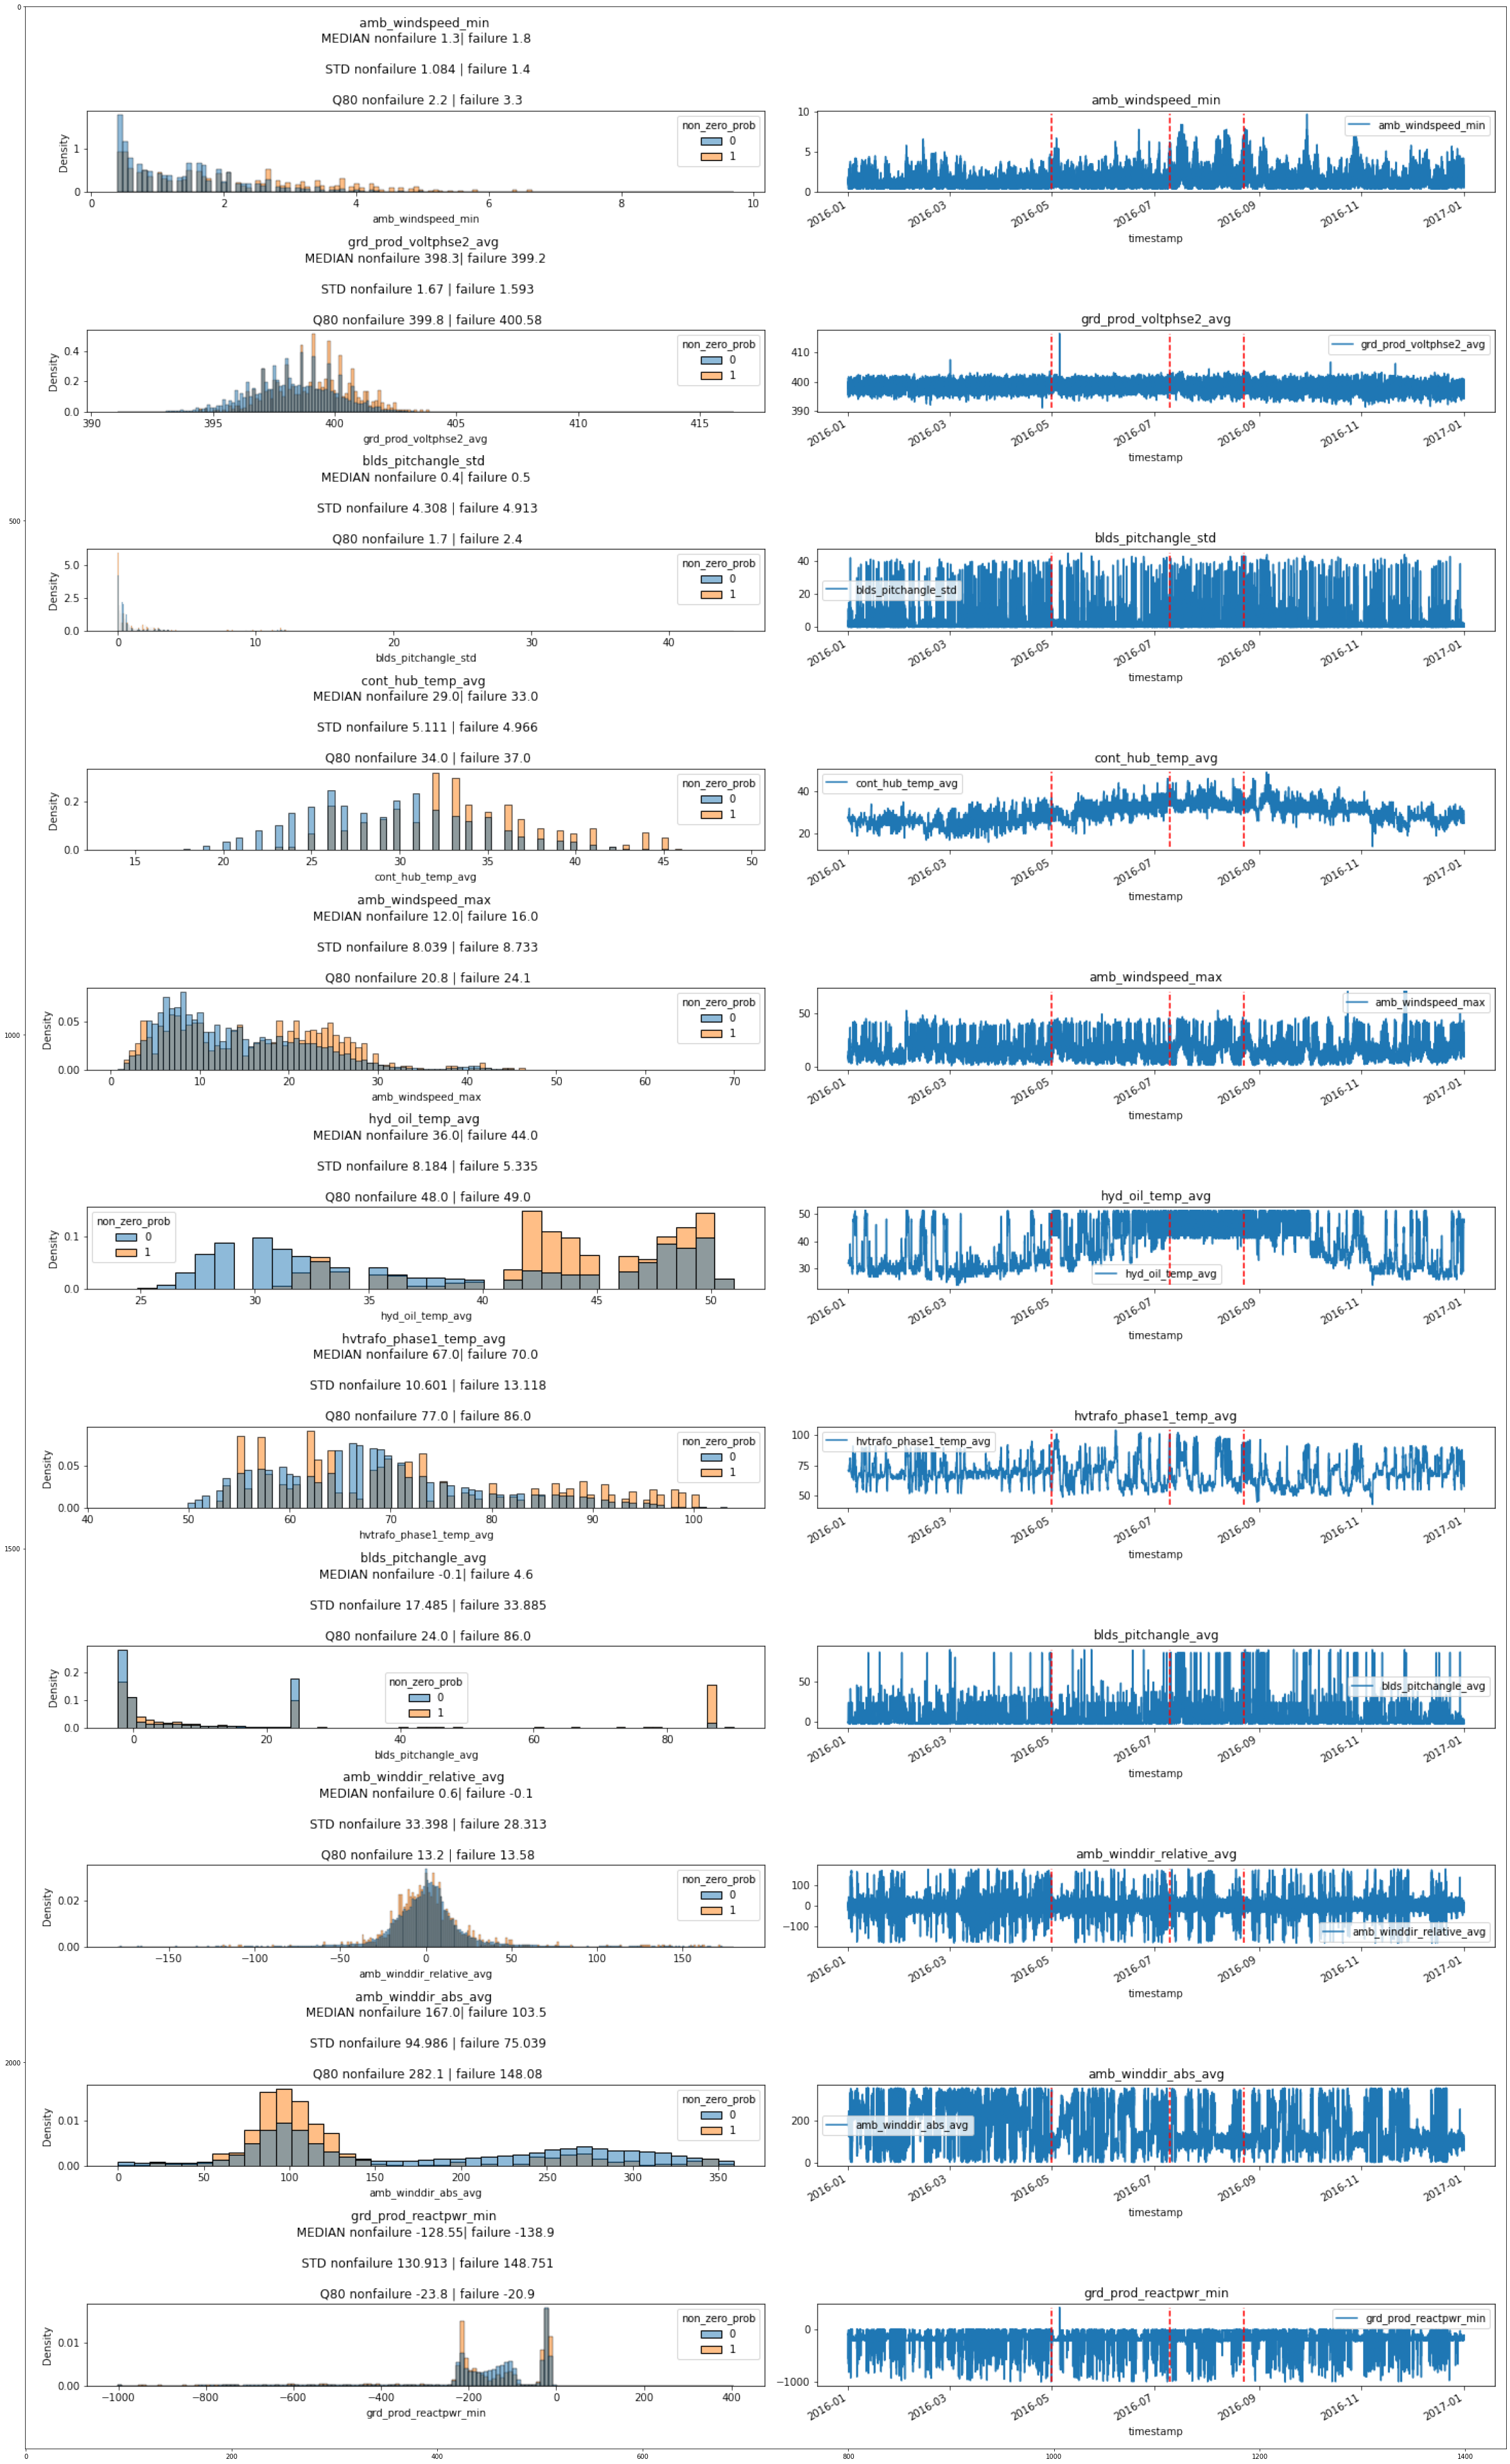

In [42]:

filename = 'histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

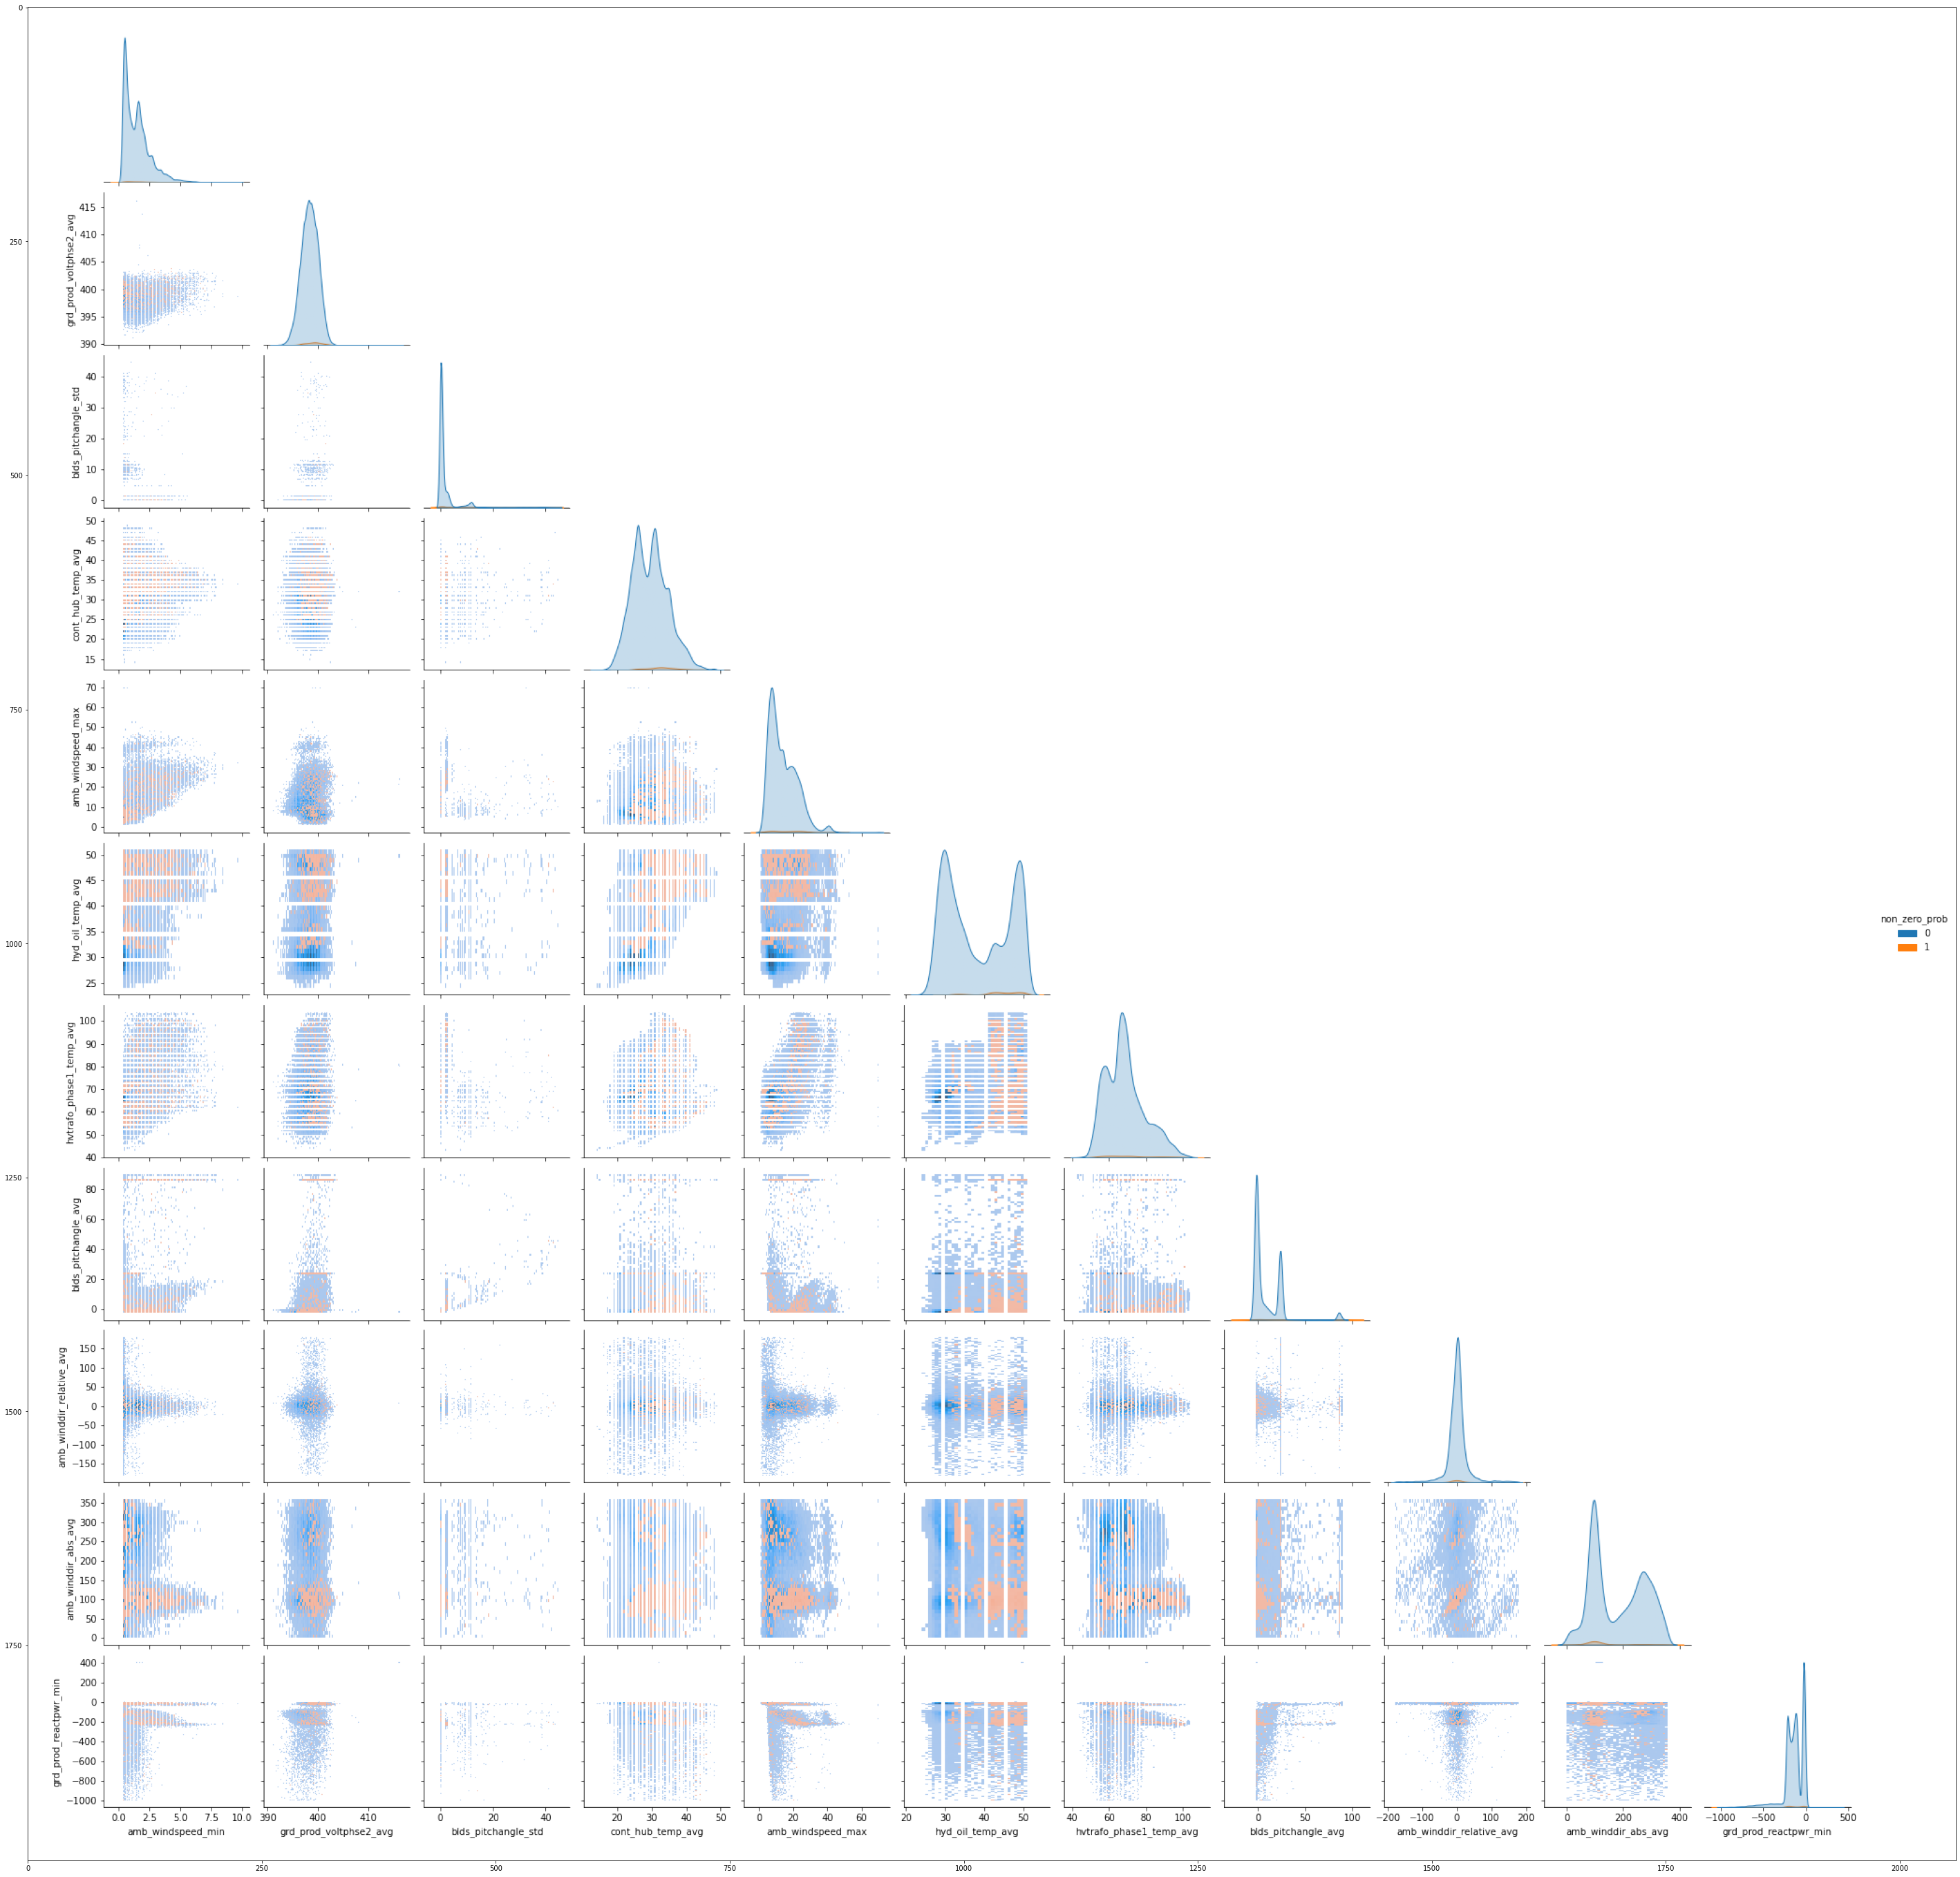

In [43]:

filename = 'float_tags_distribution'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(50,50))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

# Signals of Pre Failure
- low -> amb_windspeed_min 
- high -> blds_pitchangle_avg
- high -> amb_winddir_relative_avg
- high -> grd_prod_psbleind_std
- high -> grd_prod_reactpwr_min

# Validation

In [44]:
test_set = input_prob_failure(df=test_set)
test_set

DONE!


turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2017-01-01 00:00:00        T07           242.500     1336.500   
2017-01-01 00:10:00        T07           226.400     1307.900   
2017-01-01 00:20:00        T07           236.500     1325.900   
2017-01-01 00:30:00        T07           213.600     1322.400   
2017-01-01 00:40:00        T07           132.500     1292.400   
...                        ...               ...          ...   
2017-08-31 23:20:00        T07           150.800     1250.000   
2017-08-31 23:30:00        T07           106.000     1251.800   
2017-08-31 23:40:00        T07            22.300     1250.700   
2017-08-31 23:50:00        T07           141.500     1253.000   
2017-09-01 00:00:00        T07           151.700     1251.900   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2017-01-01 00:00:00               -1.100           384.700   
2017-01-01 00:10:00               -1.000           334.900   
2017-01-01 00:20:00               -0.600           354.500   
2017-01-01 00:30:00               -0.800           330.800   
2017-01-01 00:40:00               -0.500           262.500   
...                                  ...               ...   
2017-08-31 23:20:00                1.300           199.600   
2017-08-31 23:30:00               -0.200           197.000   
2017-08-31 23:40:00                0.600           123.100   
2017-08-31 23:50:00                0.000           209.700   
2017-09-01 00:00:00               -0.400           222.000   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2017-01-01 00:00:00               95.200             36.000   
2017-01-01 00:10:00               99.500             36.000   
2017-01-01 00:20:00               77.600             36.000   
2017-01-01 00:30:00               94.900             36.000   
2017-01-01 00:40:00              108.900             36.000   
...                                  ...                ...   
2017-08-31 23:20:00              100.700             48.000   
2017-08-31 23:30:00               96.600             48.000   
2017-08-31 23:40:00               92.700             48.000   
2017-08-31 23:50:00               90.800             48.000   
2017-09-01 00:00:00               93.000             48.000   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2017-01-01 00:00:00              1.700               -121.400   
2017-01-01 00:10:00              1.500               -109.800   
2017-01-01 00:20:00              1.900               -118.700   
2017-01-01 00:30:00              1.600               -124.800   
2017-01-01 00:40:00              1.600               -104.700   
...                                ...                    ...   
2017-08-31 23:20:00              2.100                -80.800   
2017-08-31 23:30:00              2.100                -15.900   
2017-08-31 23:40:00              1.700                324.900   
2017-08-31 23:50:00              2.700                717.100   
2017-09-01 00:00:00              2.500                -83.900   

                     grd_prod_curphse1_avg  ...  grd_prod_cosphi_avg  \
timestamp                                   ...                        
2017-01-01 00:00:00                326.900  ...                0.900   
2017-01-01 00:10:00                284.900  ...                0.900   
2017-01-01 00:20:00                302.000  ...                0.900   
2017-01-01 00:30:00                286.400  ...                0.900   
2017-01-01 00:40:00                231.300  ...                0.900   
...                                    ...  ...                  ...   
2017-08-31 23:20:00                174.900  ...                0.900   
2017-08-31 23:30:00                174.400  ...      

In [45]:
red_tags_float

['amb_windspeed_min',
 'grd_prod_voltphse2_avg',
 'blds_pitchangle_std',
 'cont_hub_temp_avg',
 'amb_windspeed_max',
 'hyd_oil_temp_avg',
 'hvtrafo_phase1_temp_avg',
 'blds_pitchangle_avg',
 'amb_winddir_relative_avg',
 'amb_winddir_abs_avg',
 'grd_prod_reactpwr_min']

In [46]:
plot_histogram_per_variable_failure(df=test_set, turbine=turbine, filename='test_histogram_per_variable_failure', tags=red_tags_float)

DONE!


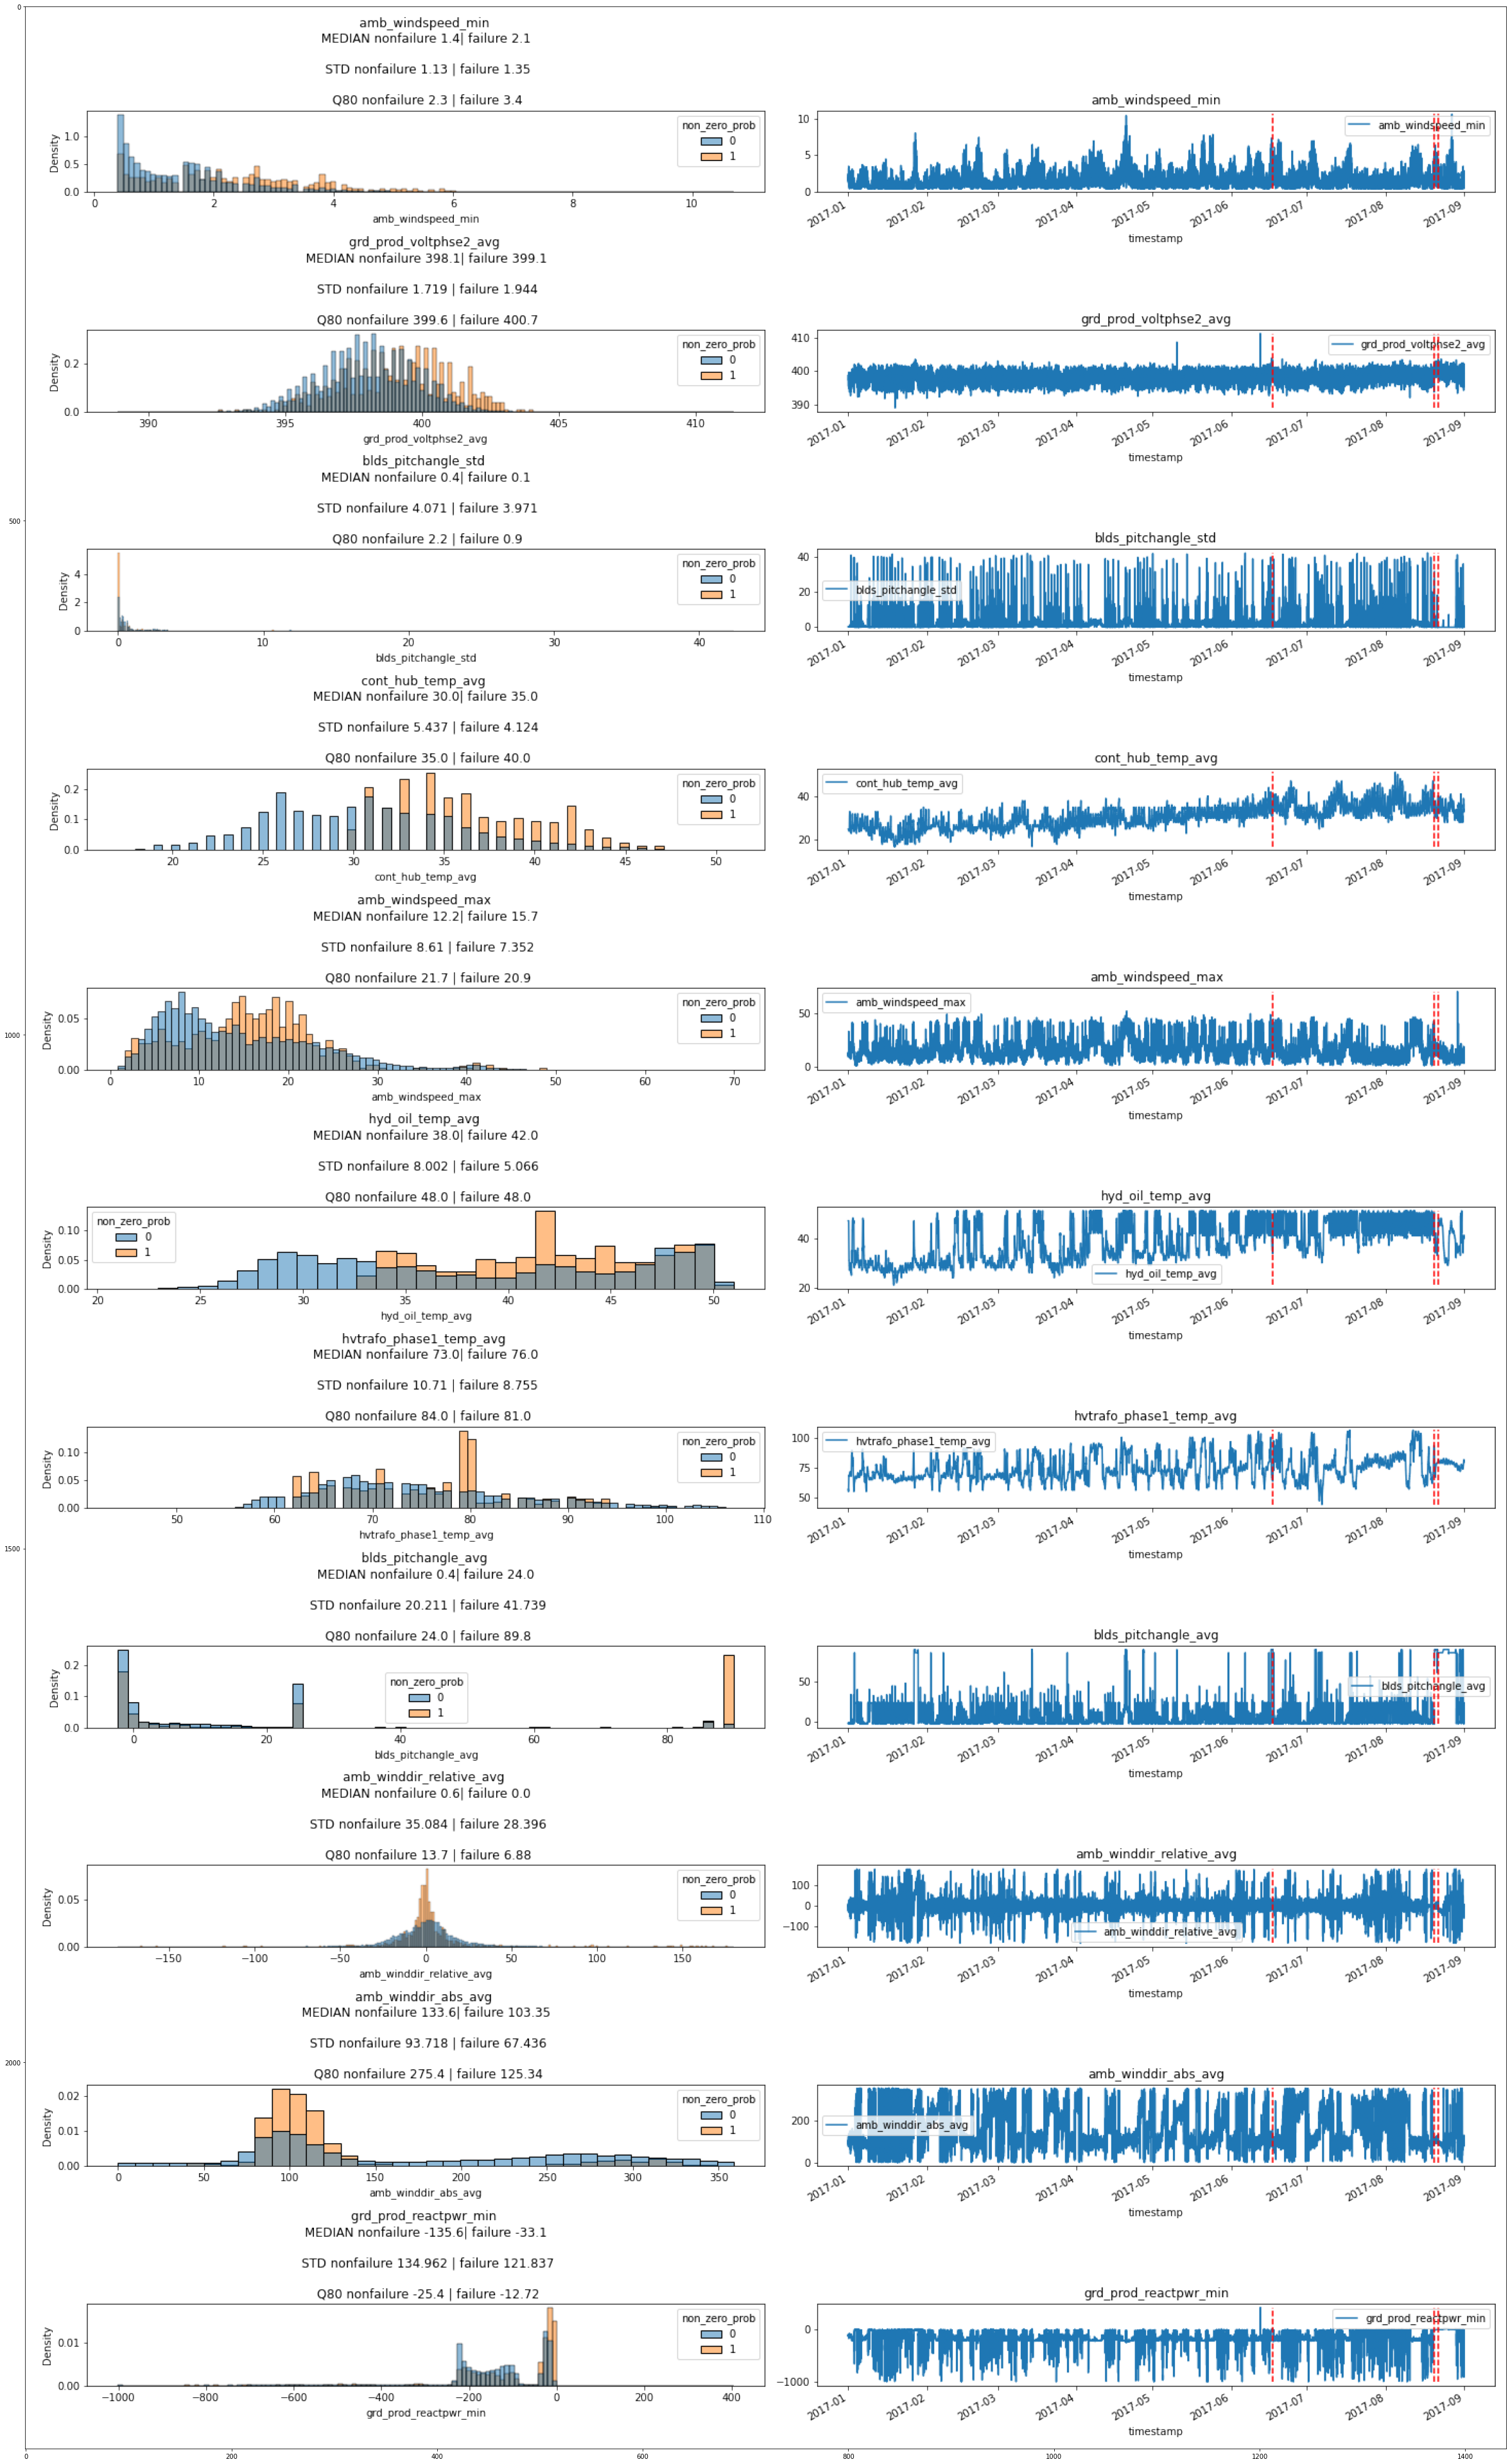

In [47]:

filename = 'test_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

In [48]:
    filename = 'compare_histogram_per_variable_failure'

    tags = red_tags_float.copy()
    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        df = training_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TRAINING_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        df = test_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TEST_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

DONE!


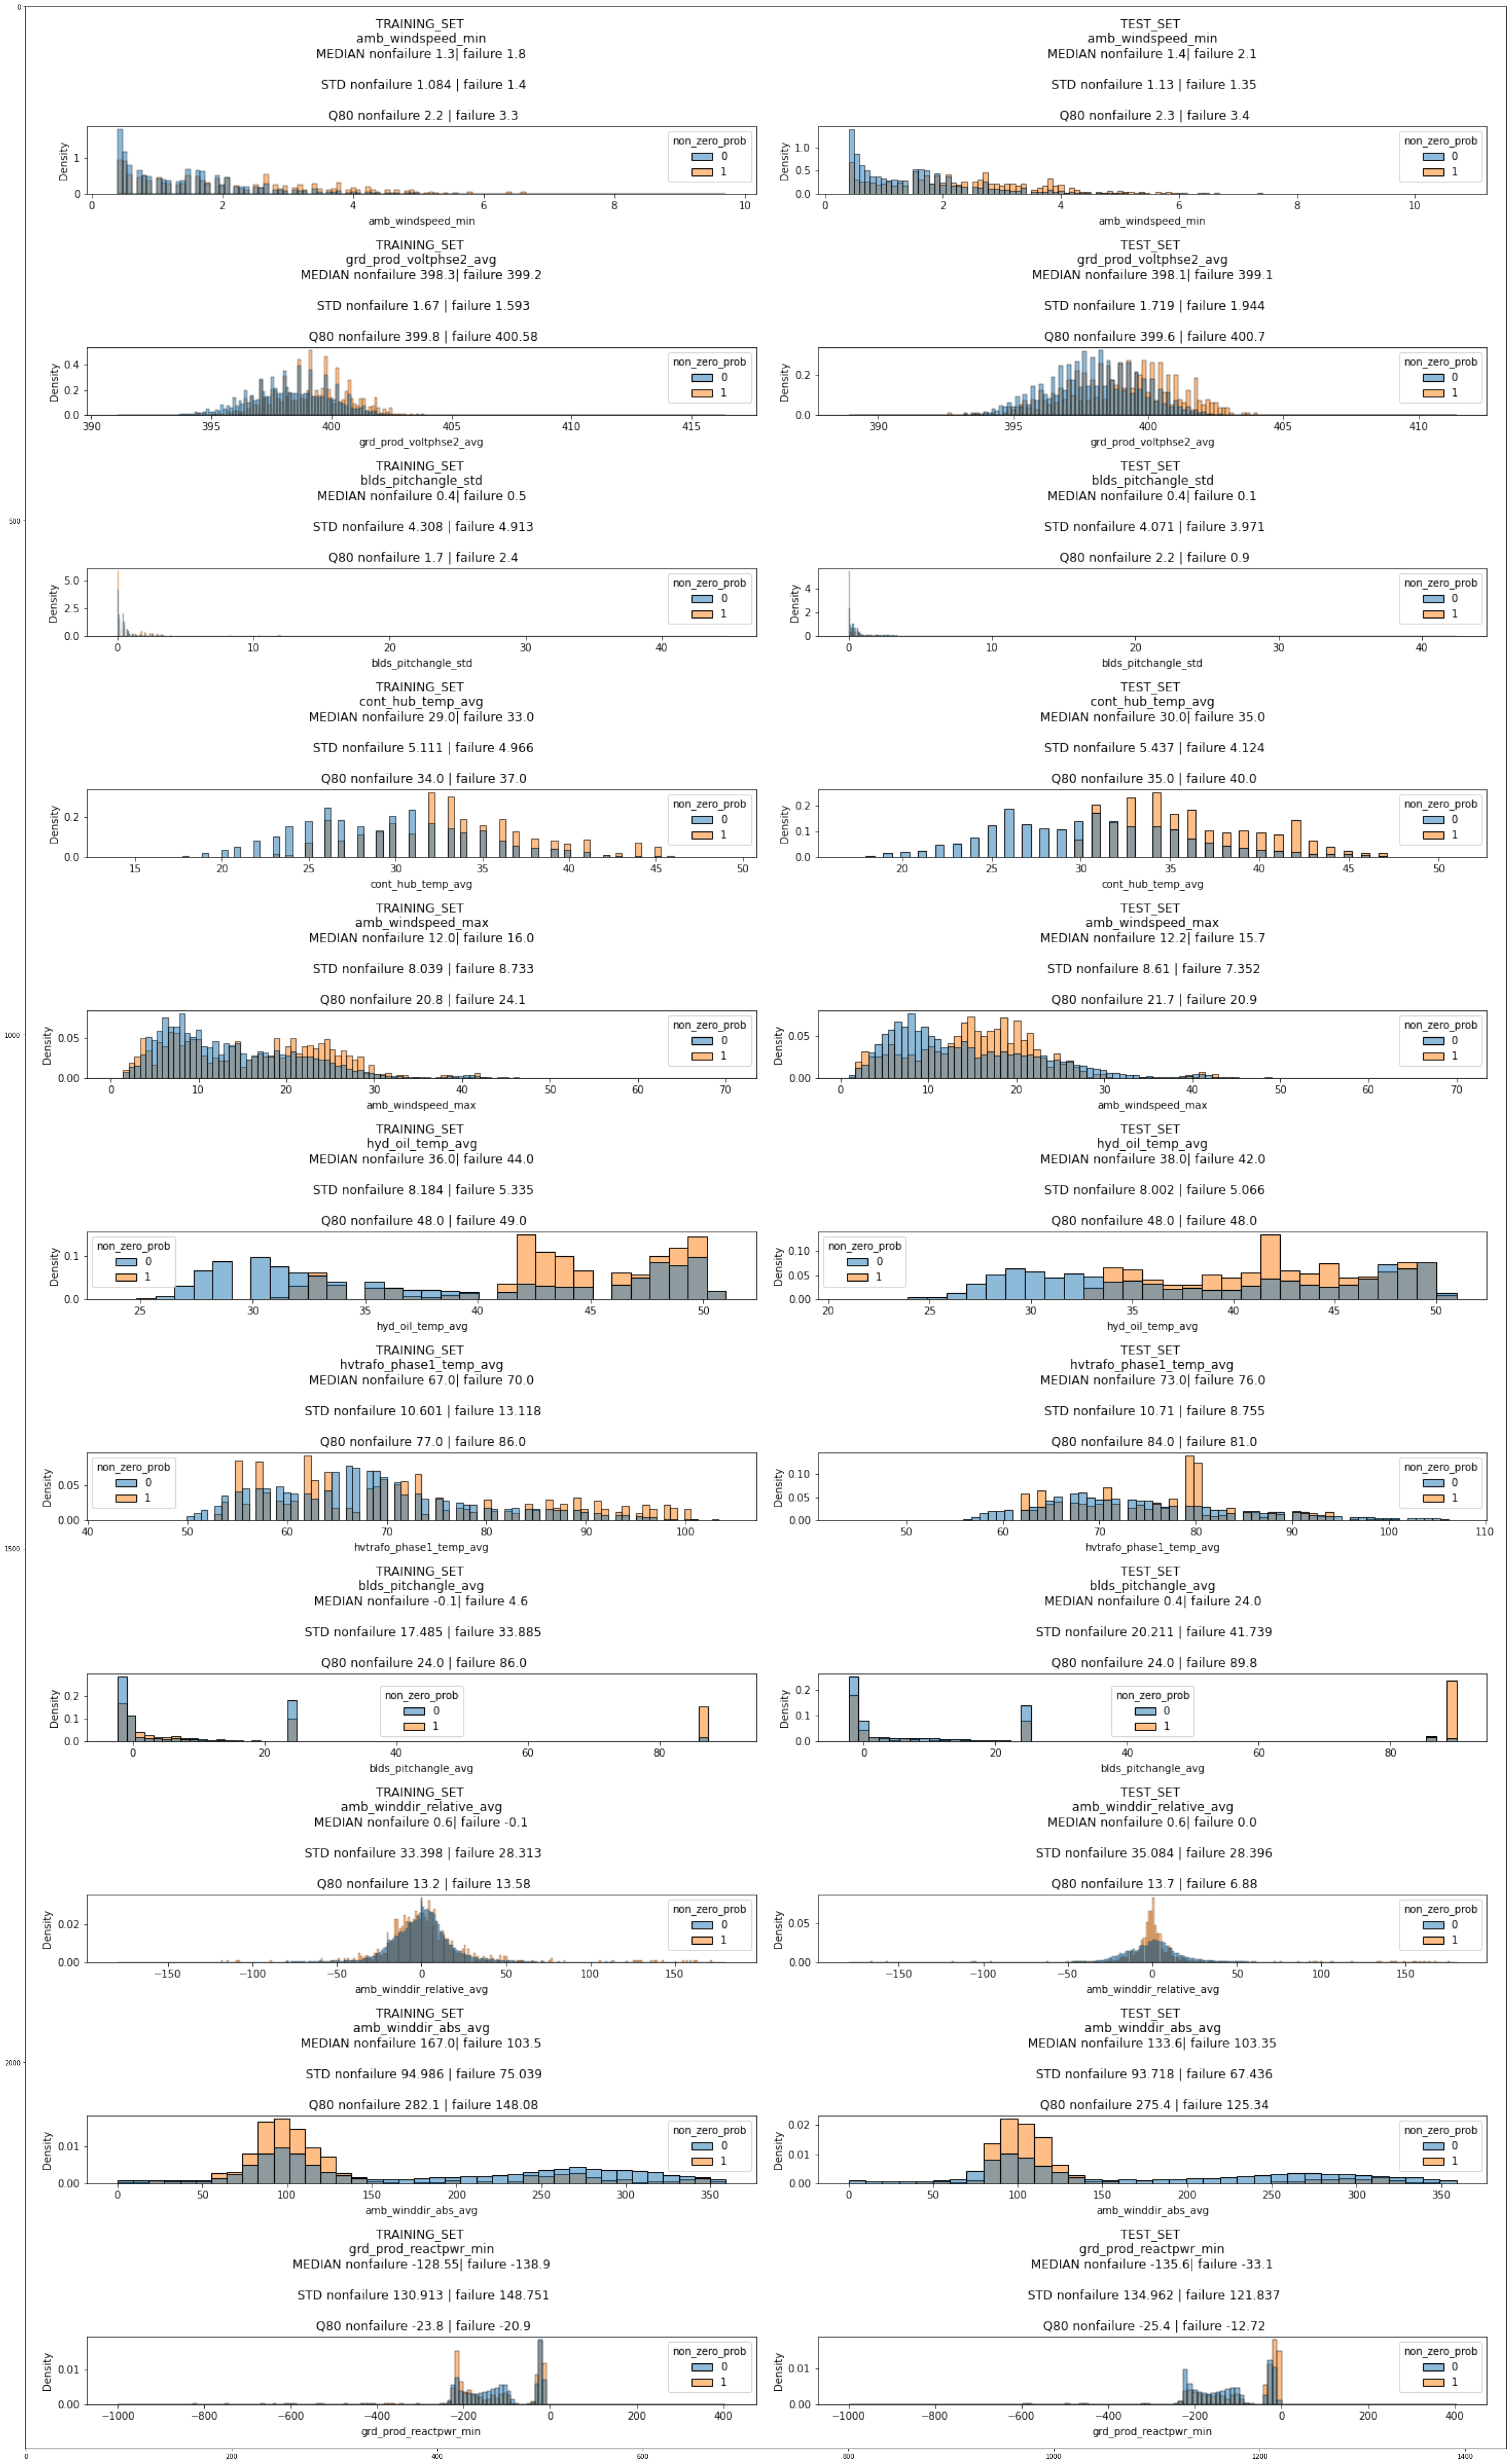

In [49]:

filename = 'compare_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()